<a href="https://colab.research.google.com/github/adnan8914/adnan8914/blob/main/student_academic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

In [3]:
# Create a static dataset
data = {
    'student_id': range(1, 101),
    'attendance': np.random.uniform(70, 100, 100),  # Attendance percentage
    'study_hours': np.random.uniform(0, 20, 100),  # Hours spent studying per week
    'socio_economic_status': np.random.choice(['low', 'medium', 'high'], 100),  # Socio-economic status
    'parent_education': np.random.choice(['none', 'high_school', 'bachelor', 'master'], 100),  # Parent's education level
    'extracurricular_activities': np.random.randint(0, 5, 100),  # Number of extracurricular activities
    'sleep_hours': np.random.uniform(4, 10, 100),  # Average sleep hours per night
    'internet_access': np.random.choice([0, 1], 100),  # 0: No, 1: Yes
    'final_grade': np.random.uniform(50, 100, 100)  # Final grades
}


In [5]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [6]:
df.to_csv('student_performance_data.csv', index=False)

In [7]:
print(df.head())

   student_id  attendance  study_hours socio_economic_status parent_education  \
0           1   81.236204     0.628584                  high      high_school   
1           2   98.521429    12.728208                   low         bachelor   
2           3   91.959818     6.287120                medium      high_school   
3           4   87.959755    10.171414                medium             none   
4           5   74.680559    18.151329                  high           master   

   extracurricular_activities  sleep_hours  internet_access  final_grade  
0                           0     5.500099                1    93.911033  
1                           4     7.483264                1    87.849957  
2                           4     9.202700                1    52.344823  
3                           0     7.371200                1    63.433624  
4                           4     5.431581                1    51.109237  


In [8]:
# Data Preprocessing
# Convert categorical variables to numerical
df['socio_economic_status'] = df['socio_economic_status'].map({'low': 0, 'medium': 1, 'high': 2})
df['parent_education'] = df['parent_education'].map({'none': 0, 'high_school': 1, 'bachelor': 2, 'master': 3})

In [9]:
# Feature selection
features = ['attendance', 'study_hours', 'socio_economic_status', 'parent_education',
            'extracurricular_activities', 'sleep_hours', 'internet_access']
X = df[features]
y = df['final_grade']  # Target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 203.21129485176732
R^2 Score: -0.30574841959893395


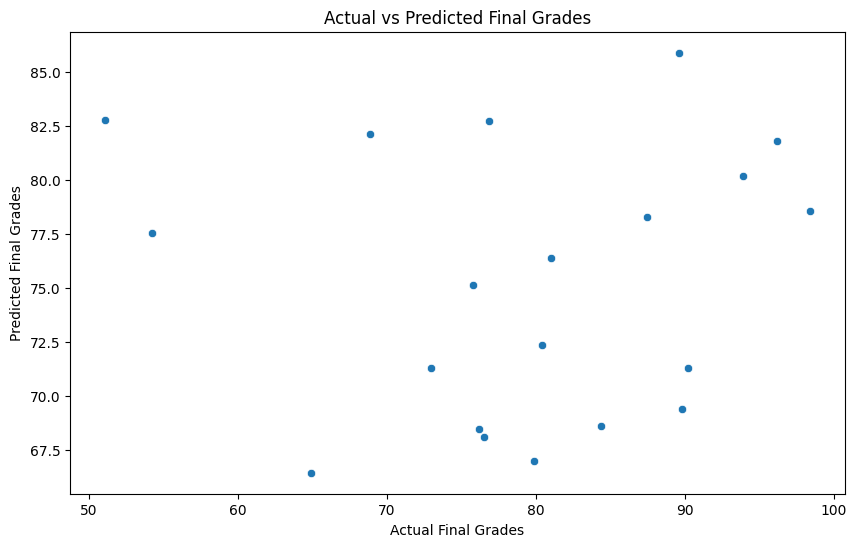

In [15]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Actual vs Predicted Final Grades')
plt.show()